# MSIS 2629 - Data Visualization
# Submitted by: Yuhao Wang

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fuzzywuzzy import fuzz
from urllib2 import urlopen, URLError
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("test.csv")

The Entity's name with '&' will have some negative influences on the web scraping. I decide to deal with it firstly.

In [4]:
df['Entity'][df.Entity == 'AT&T'] = 'ATT'
df['Entity'][df.Entity == 'D&B, Altegrity'] = 'Altegrity'

In [5]:
helper = df.Entity
helper = list(helper)

Web Scraping

In [6]:
res = []
for i in helper:
    url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query=' + '%20'.join(i.split(' ')) + '&region=1&lang=en'
    #print url
    resp = urlopen(url)
    s = resp.read()
    res.append(s)

Change string to json, and skip the useless rows(private company or non-profit organization)

In [7]:
import json
for i in range(0,len(res)):
    j = json.loads(res[i])
    if j['ResultSet']['Result'] == []:
        res[i] = '' 

Further check, use fuzzwuzzy to regonize match Entity's name and stock symbol

In [8]:
df['Raw_Symbol'] = res
df = df[df.Raw_Symbol != '']
df = df.reset_index()
df = df.ix[:,1:8]

In [9]:
for i in range(0, len(df.Raw_Symbol)):
    if fuzz.partial_ratio(df.Entity[i], df.Raw_Symbol[i][28:]) <= 0:
        df.Raw_Symbol[i] = ''
df = df[df.Raw_Symbol != '']
df = df.reset_index()
df = df.ix[:,1:8]

In [10]:
for i in range(0, len(df.Raw_Symbol)):
    j = json.loads(df.Raw_Symbol[i])
    helper = j['ResultSet']['Result']
    for h in range(0, len(helper)):
        if fuzz.partial_ratio(df.Entity[i], helper[h]) >= 50:
            df.Raw_Symbol[i] = helper[0]['symbol']

Double check

In [11]:
df = df[df.Entity != 'University of Miami'][df.Entity != 'LinkedIn'][df.Entity != 'Stratfor'][df.Entity != 'Health Net '][df.Entity != 'Fling'] 
df = df.reset_index()
df = df.ix[:,1:8]
df

,Entity,YEAR,records lost,ORGANISATION,METHOD OF LEAK,DATA SENSITIVITY,Raw_Symbol
0,Automatic Data Processing,2005,125000,financial,poor security,SSN/Personal details,ADP
1,Citigroup,2005,3900000,financial,lost / stolen device,Credit card information,CIT-U.TI
2,Hewlett Packard,2006,200000,"tech, retail",lost / stolen device,SSN/Personal details,HPQ
3,Gap Inc,2007,800000,retail,lost / stolen device,SSN/Personal details,GPS
4,TD Ameritrade,2007,6300000,financial,hacked,Just email address/Online information,AMTD
5,Fidelity National Information Services,2007,8500000,financial,inside job,Credit card information,FIS
6,Dai Nippon Printing,2007,8637405,retail,inside job,Just email address/Online information,DNPLY
7,ATT,2008,113000,telecoms,lost / stolen device,Just email address/Online information,T
8,Starbucks,2008,97000,retail,lost / stolen device,SSN/Personal details,SBUX
9,Network Solutions,2009,573000,tech,hacked,Credit card information,LYNS


In [12]:
#The Anthem's data breaches happened in Feb, 2015, I aslo checked the original data's 'story' column, which also refers to
#the 2015's data breaches, so the year of Anthem that they offered is not correct, I change it to correct one
df.ix[36, 1] = 2015

In [13]:
healthcare = df[df.ORGANISATION == "healthcare"]
healthcare

,Entity,YEAR,records lost,ORGANISATION,METHOD OF LEAK,DATA SENSITIVITY,Raw_Symbol
29,Community Health Systems,2014,4500000,healthcare,hacked,SSN/Personal details,CYH
36,Anthem,2015,80000000,healthcare,hacked,SSN/Personal details,ANTM
37,Quest Diagnostics,2017,34000,healthcare,hacked,Email password/Health records,DGX


/Users/yuhaowang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/fix_yahoo_finance/__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and no longer available.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


[*********************100%***********************]  1 of 1 downloaded

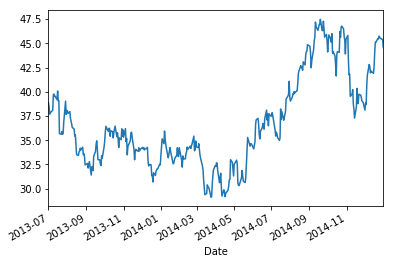

/Applications/Canopy.app/appdata/canopy-1.7.4.3348.macosx-x86_64/Canopy.app/Contents/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-11-04 03:25:05.632470. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
import fix_yahoo_finance as yf
CYH = yf.download("CYH", start="2013-07-01", end="2014-12-31")
stock1 = CYH.Close
stock1.plot()

In [19]:
import pandas_datareader.data as web
import datetime
import warnings
warnings.filterwarnings('ignore')

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2016, 1, 1)
ANTM = web.DataReader('ANTM','yahoo', start, end)

dates =[]
for x in range(len(ANTM)):
    newdate = str(ANTM.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
ANTM['dates'] = dates

# Create a Series called nf
stock2 = ANTM.Close

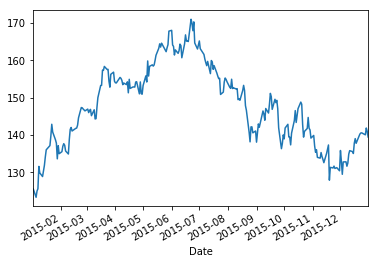

In [20]:
stock2.plot()

In [21]:
CYH.to_csv('CYH_stock.csv')

In [22]:
ANTM.to_csv('ANTM_stock.csv')

In [34]:
import fix_yahoo_finance as yf
data = yf.download("DGX", start="2016-10-01", end="2017-07-01")
stock = data.Close

[*********************100%***********************]  1 of 1 downloaded

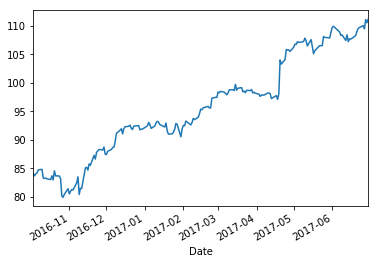

In [35]:
stock.plot()

In [36]:
data.to_csv('DGX_stock.csv')